<a href="https://colab.research.google.com/github/DhanvinS/Projects/blob/main/An%20Analysis%20of%20all%20models/%20KNN%2C_LR%2C_SVM%2C_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
dataset = files.upload()

Saving DiabetesData.csv to DiabetesData.csv


In [4]:
# Importing all the required modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [5]:
df = pd.read_csv('DiabetesData.csv')
df.tail()

,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes
99995,136,8.3,6.4,4.5,29.8,0.93,126,74,45,150,116,113,109,14.58,5.55,26.0,0
99996,76,8.8,6.8,4.8,26.5,0.86,130,76,55,123,146,96,146,9.02,5.97,24.4,0
99997,121,9.9,5.0,6.1,25.6,0.83,107,87,50,111,184,93,132,2.57,5.21,27.6,0
99998,52,5.9,6.7,0.5,26.8,0.89,115,77,68,91,116,106,117,9.81,5.53,26.4,0
99999,248,2.7,5.4,5.5,30.3,1.00,109,77,31,183,87,91,142,15.93,5.73,27.9,0


In [7]:
df.shape

(100000, 17)

In [9]:
# Splitting the features and target labels

x = df.iloc[ : , :-1].values
y = df.iloc[ : , -1].values

In [13]:
# Defining a function to average accuracy over 20 runs

def average_accuracy(model_fn, x, y,n_runs = 20, test_size = 0.25, random_state = None):
  accuracies = []
  for i in range(n_runs):
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size = test_size, random_state = None
    )
    model = model_fn()
    model.fit(x_train, y_train)
    y_predicted = model.predict(x_test)
    accuracies.append(accuracy_score(y_test, y_predicted))
  return np.mean(accuracies)

**1) KNN**

In [14]:
k_values = range(3, 21)
knn_accuracies = []

for k in k_values:
  avg_acc = average_accuracy(lambda: KNeighborsClassifier(n_neighbors=k), x, y)
  knn_accuracies.append(avg_acc)

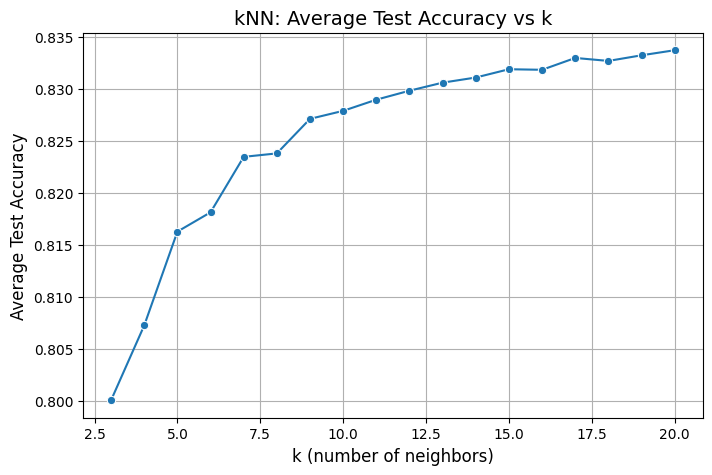

In [15]:
# Plotting k vs accuracy
# using seaborn for this

import seaborn as sb


# Convert results into a DataFrame for Seaborn
knn_df = pd.DataFrame({
    'k': k_values,
    'Average Test Accuracy': knn_accuracies
})

# Create the line plot
plt.figure(figsize=(8, 5))
sb.lineplot(data=knn_df, x='k', y='Average Test Accuracy', marker='o')
plt.title('kNN: Average Test Accuracy vs k', fontsize=14)
plt.xlabel('k (number of neighbors)', fontsize=12)
plt.ylabel('Average Test Accuracy', fontsize=12)
plt.grid(True)
plt.show()



**2) Naive Bayes (Gaussian and Multinomial)**

In [16]:
# Gaussian Naive Bayes
gaussian_acc = average_accuracy(lambda: GaussianNB(), x, y)

# Multinomial Naive Bayes (features must be non-negative)
X_non_negative = np.clip(x, a_min=0, a_max=None)
multinomial_acc = average_accuracy(lambda: MultinomialNB(), X_non_negative, y)

print(f"GaussianNB Average Accuracy: {gaussian_acc:.4f}")
print(f"MultinomialNB Average Accuracy: {multinomial_acc:.4f}")


GaussianNB Average Accuracy: 0.8602
MultinomialNB Average Accuracy: 0.6453


**3) Logistic Regression**

I used a scaler to standardize all features to the same scale, so no feature dominates due to its magnitude.
This helps this algorithm converge faster and perform better.

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

log_reg_acc = average_accuracy(
    lambda: LogisticRegression(max_iter=2000, solver='lbfgs', n_jobs=-1),
    X_scaled, y
)
print(f"Logistic Regression (scaled) Average Accuracy: {log_reg_acc:.4f}")


Logistic Regression (scaled) Average Accuracy: 0.8586


**4) Support Vector Machine (SVM)**

In [22]:
# Using RBF kernel with default C=1.0 and gamma='scale'

svm_acc = average_accuracy(
    lambda: SVC(kernel='rbf', C=1.0, gamma='scale'), x, y
)
print(f"SVM (RBF kernel) Average Accuracy: {svm_acc:.4f}")


SVM (RBF kernel) Average Accuracy: 0.8459


**Summary of all results I got above**

In [23]:
results = {
    "Best kNN": max(knn_accuracies),
    "Gaussian NB": gaussian_acc,
    "Multinomial NB": multinomial_acc,
    "Logistic Regression": log_reg_acc,
    "SVM (RBF kernel)": svm_acc
}

for model, acc in results.items():
    print(f"{model}: {acc:.4f}")


Best kNN: 0.8338
Gaussian NB: 0.8602
Multinomial NB: 0.6453
Logistic Regression: 0.8586
SVM (RBF kernel): 0.8459
